<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Machine_Learning/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN-Model

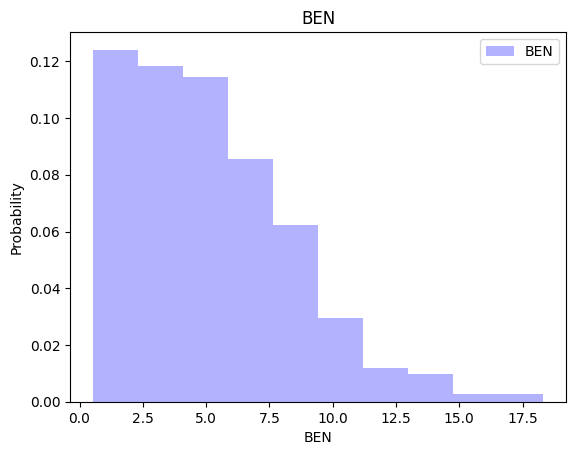

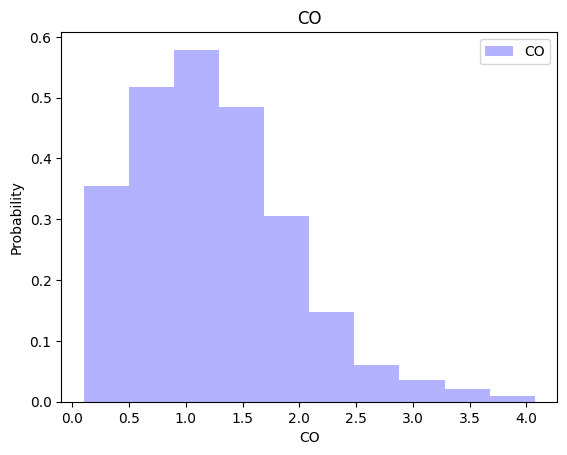

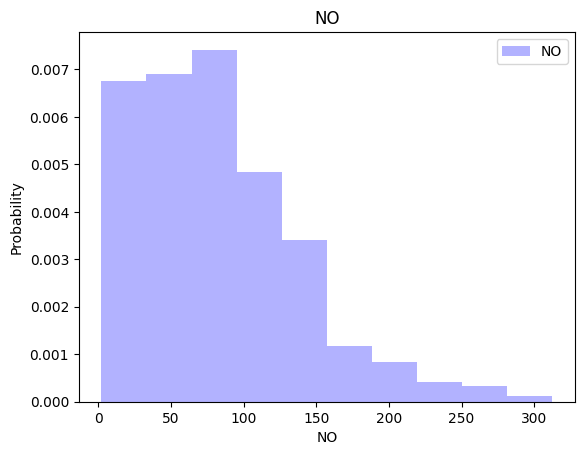

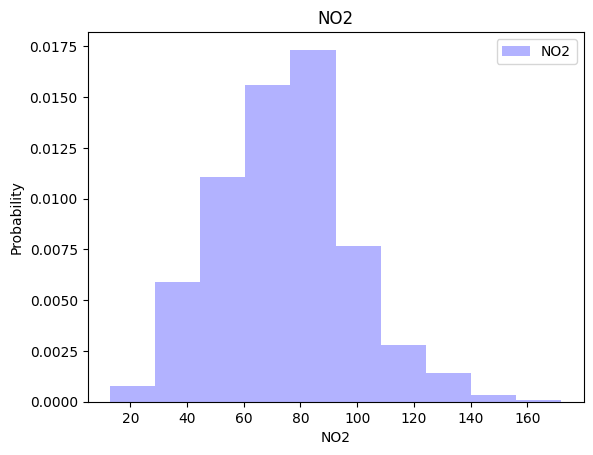

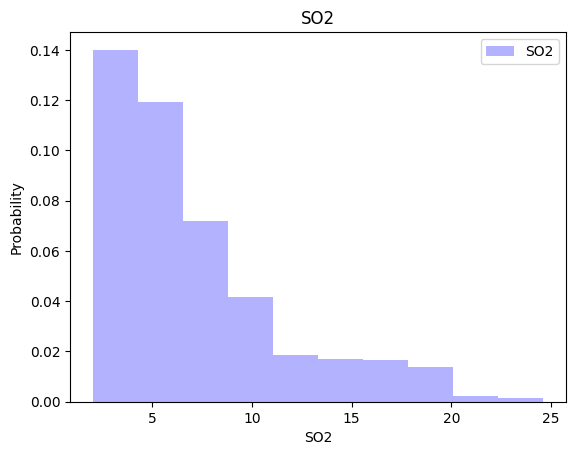

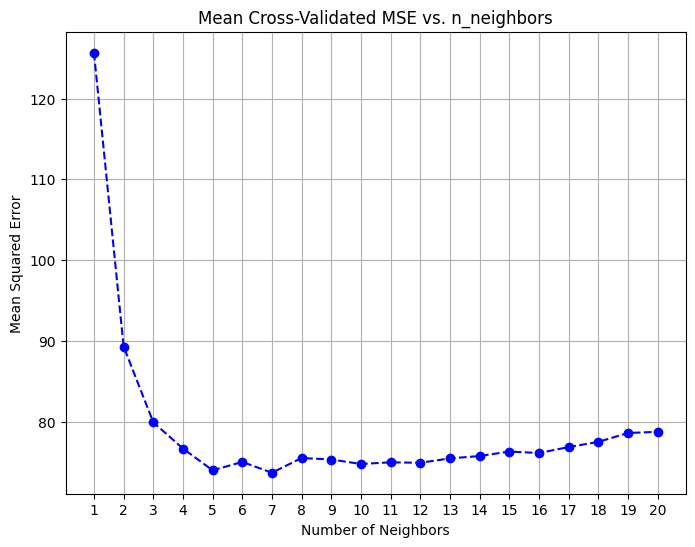

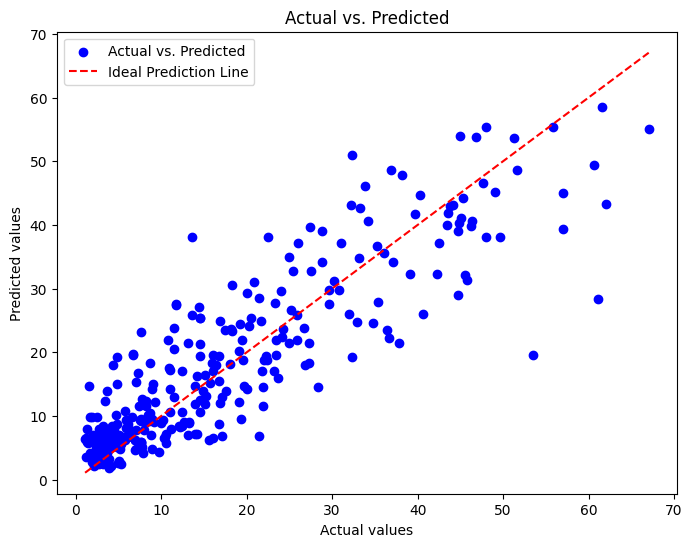

Custom Regression Report:
Mean Absolute Error: 5.26
Mean Squared Error: 52.21
R-squared (R2): 0.77


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load your dataset
df = pd.read_csv('/content/DATAML.csv')

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Visualizations allow us to easily understand any patterns, trends, or outliers in a data set :)

cols = df.columns.tolist()    # Here we make a list with all labels names

for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the range of neighbors to search
param_grid = {
    'n_neighbors': range(1, 21)
}

# Create KNN model
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best number of neighbors
grid_search = GridSearchCV(knn, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Extract mean cross-validated MSE and corresponding n_neighbors
mean_mse = -grid_result.cv_results_['mean_test_score']
n_neighbors = range(1, 21)

# Plotting mean cross-validated MSE for different values of n_neighbors
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors, mean_mse, marker='o', linestyle='dashed', color='blue')
plt.title('Mean Cross-Validated MSE vs. n_neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.xticks(n_neighbors)
plt.grid(True)
plt.show()

# Get the best hyperparameters found
best_n_neighbors = grid_result.best_params_['n_neighbors']

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Random Forest Regression

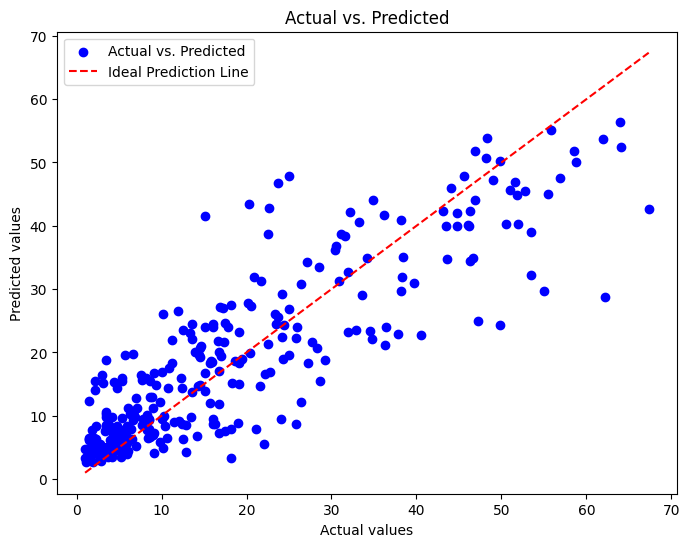

Custom Regression Report:
Mean Absolute Error: 5.88
Mean Squared Error: 64.52
R-squared (R2): 0.75


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/DATAML.csv')

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest model
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Extract mean cross-validated MSE and corresponding hyperparameters
mean_mse = -grid_result.cv_results_['mean_test_score']
best_params = grid_result.best_params_

# Get the best hyperparameters found
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


# Support Vector Regression  (SVR)

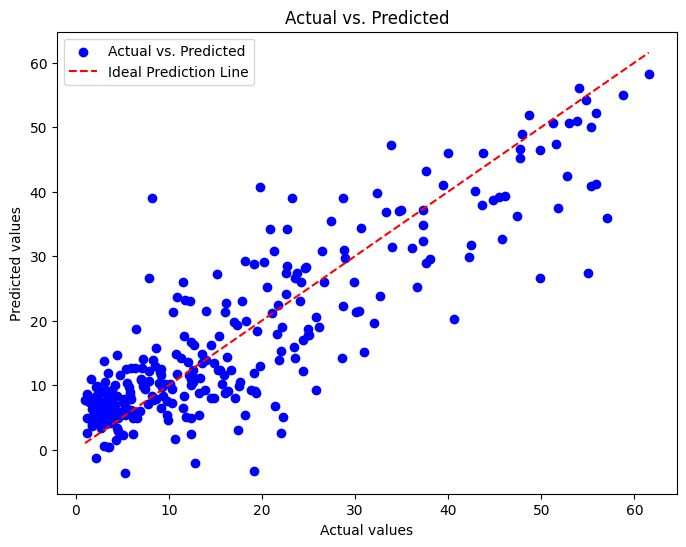

Custom Regression Report:
Mean Absolute Error: 5.51
Mean Squared Error: 54.28
R-squared (R2): 0.76


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/DATAML.csv')
df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Check if the resulting DataFrame is empty after filtering
if df.empty:
    print("Filtered dataset is empty. Adjust filtering conditions or handle an empty dataset.")
else:
    # Split the data into features and target variable
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the hyperparameters and their expanded ranges to search
    param_dist = {
        'C': np.logspace(-5, 5, 1000),  # Expanded range for C
        'gamma': np.logspace(-5, 5, 100),  # Expanded range for gamma
        'epsilon': np.linspace(0.001, 6, 100)  # Expanded range for epsilon
        # Add more hyperparameters and values if needed
    }

    # Create RandomizedSearchCV for more efficient hyperparameter search
    svr = SVR()
    random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=100,
                                       scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Get the best hyperparameters found
    best_params = random_search.best_params_

    # Train the model with the best hyperparameters
    best_svr = SVR(**best_params)
    best_svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_svr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Plotting predictions vs. actual values including the line for perfect predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',
             label='Ideal Prediction Line')
    plt.title('Actual vs. Predicted')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.show()

    # Display the custom regression report
    print("Custom Regression Report:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")


# Extra Trees Regressor

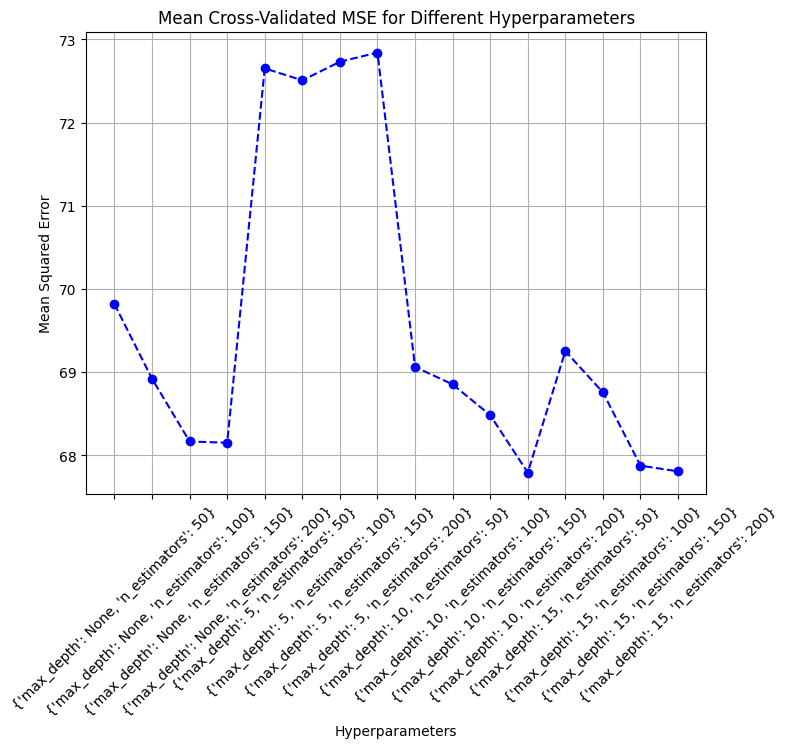

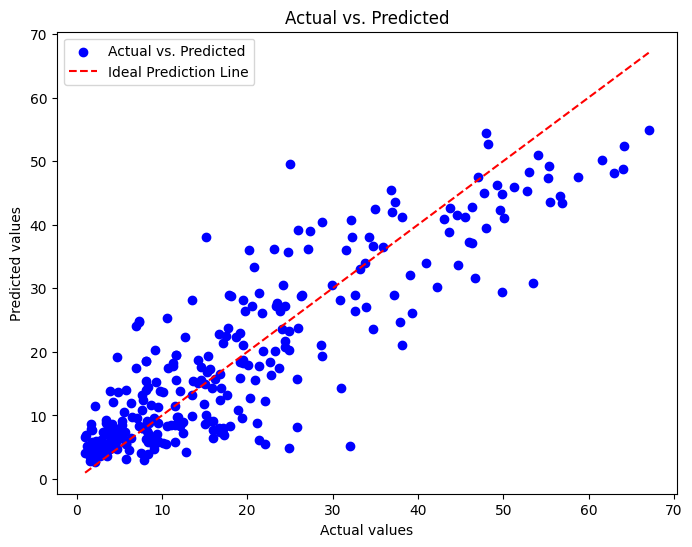

Regression Metrics:
Mean Absolute Error: 5.62
Mean Squared Error: 54.91
R-squared (R2): 0.78


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/DATAML.csv')

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]


# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Adjust as needed
    'max_depth': [None, 5, 10, 15]  # Adjust as needed
}

# Create Extra Trees Regressor model
extra_trees = ExtraTreesRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(extra_trees, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Extract mean cross-validated MSE and corresponding hyperparameters
mean_mse = -grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

# Plotting mean cross-validated MSE for different hyperparameters
plt.figure(figsize=(8, 6))
plt.plot(range(len(mean_mse)), mean_mse, marker='o', linestyle='dashed', color='blue')
plt.xticks(range(len(mean_mse)), params, rotation=45)
plt.title('Mean Cross-Validated MSE for Different Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Get the best hyperparameters found
best_params = grid_result.best_params_

# Train the Extra Trees Regressor model with the best hyperparameters
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=42)
best_extra_trees.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_extra_trees.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

# Display the regression metrics
print("Regression Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


# XGBoost

[I 2023-11-14 19:39:44,727] A new study created in memory with name: no-name-b69e2ed3-53d8-4d5c-bc25-e61f6453d4c5
<ipython-input-30-94907c25e1b5>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
<ipython-input-30-94907c25e1b5>:37: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
<ipython-input-30-94907c25e1b5>:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 

Best Hyperparameters:
{'n_estimators': 286, 'max_depth': 6, 'learning_rate': 0.01101008277166539, 'min_child_weight': 4, 'subsample': 0.628371781931127, 'colsample_bytree': 0.9692880228177881, 'gamma': 0.03866415406942782}

Regression Metrics:
Mean Absolute Error: 5.34
Mean Squared Error: 53.24
R-squared (R2): 0.78


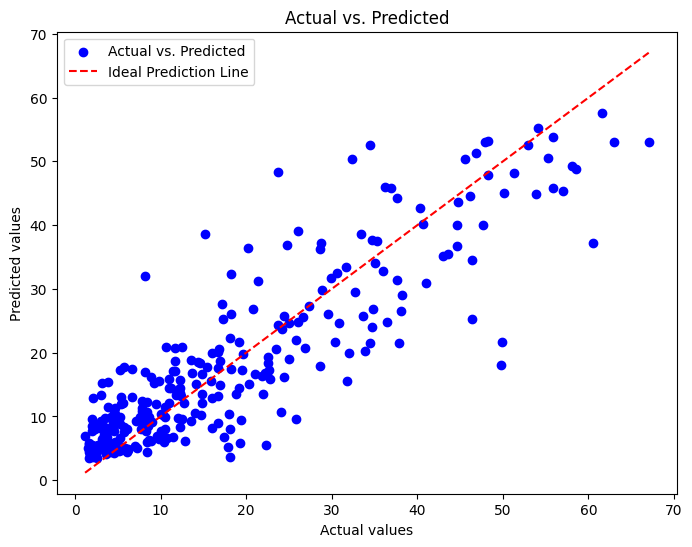

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/DATAML.csv')

df = df.sample(frac=1).reset_index(drop=True)

# Filtering out rows where any value in a column is less than or equal to zero
for column in df.columns:
    df = df[df[column] > 0]

# Split the data into features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1600),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0)
    }

    xgb = XGBRegressor(**params, random_state=42)
    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
best_xgb = XGBRegressor(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the best hyperparameters and regression metrics
print("Best Hyperparameters:")
print(best_params)
print("\nRegression Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting predictions vs. actual values including the line for perfect predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()
